<a href="https://colab.research.google.com/github/patelhiren3385/Computer_Vision/blob/master/Detectron2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install dependencies: 
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 703.8MB 26kB/s 
     |████████████████████████████████| 6.6MB 41.5MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101
     |████████████████████████████████| 276kB 7.1MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=3381f1ad756e770c11c9a77413a2adac9a1e0267a57a69e50a30f7cb36710fd3
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip

In [ ]:
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

#Detecron
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer




In [ ]:
!pwd

/content


In [ ]:
%cd /content/drive/My\ Drive/YOLO/Dataset_Text/train

/content/drive/My Drive/YOLO/Dataset_Text/train


In [ ]:
!ls

Annotation  Image  train_without_word.json  train_with_word.json


In [ ]:
import json
from detectron2.structures import BoxMode

def get_board_dicts(imgdir):
  json_file = imgdir+"/train_without_word.json"
  with open(json_file) as f:
    dataset_dicts = json.load(f)

  for i in dataset_dicts:
    filename = i["file_name"]
    i["file_name"] = imgdir+"/"+filename
    for j in i["annotations"]:
      j["category_id"] = 0
      j["bbox_mode"] = BoxMode.XYWH_ABS
  return dataset_dicts


In [ ]:
from detectron2.data import MetadataCatalog,DatasetCatalog
for d in ["train","test"]:
  %cd /content/drive/My\ Drive/YOLO/Dataset_Text
  DatasetCatalog.register("board_" + d, lambda d=d: get_board_dicts(d+"/Image/1"))
  MetadataCatalog.get("board_" + d).set(thing_classes=["Text"])
board_metadata = MetadataCatalog.get("board_train")

/content/drive/My Drive/YOLO/Dataset_Text


/content/drive/My Drive/YOLO/Dataset_Text


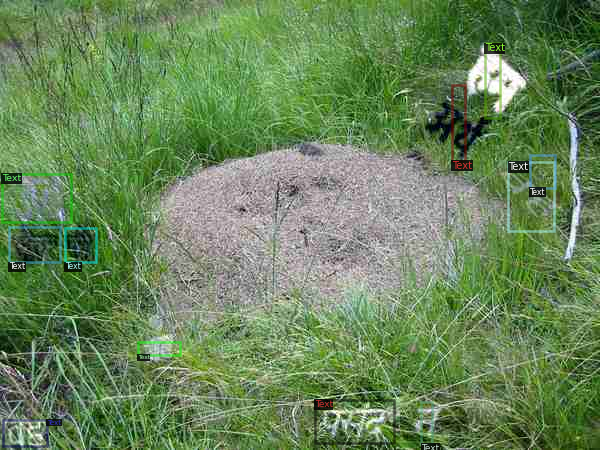

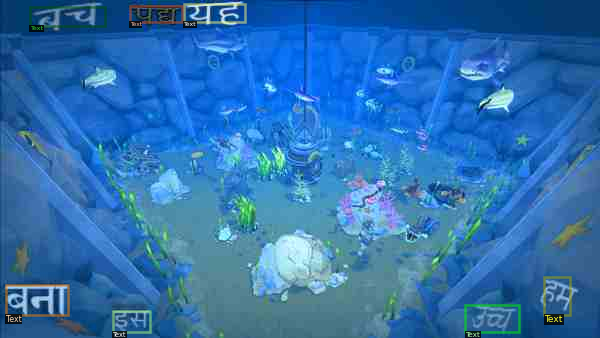

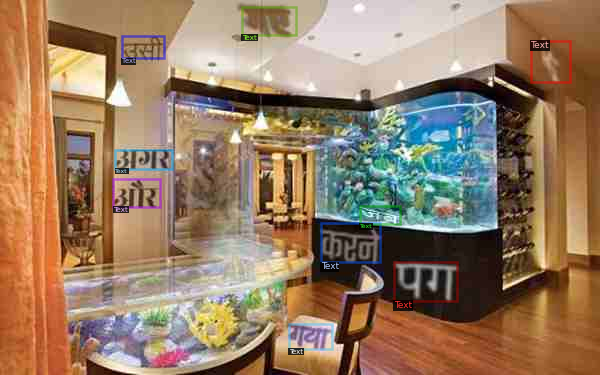

In [ ]:
#Visualizing the Train Dataset
%cd /content/drive/My\ Drive/YOLO/Dataset_Text
dataset_dicts = get_board_dicts("train/Image/1")
#Randomly choosing 3 images from the Set
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=board_metadata)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])



In [ ]:
d

{'annotations': [{'bbox': [289.13312, 323.93536, 43.21423, 24.82276],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0},
  {'bbox': [394.09433, 262.42496, 62.45941, 38.96064],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0},
  {'bbox': [242.05553, 7.7725334, 54.15242, 27.7838566],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0},
  {'bbox': [320.59998, 223.62982, 59.69696, 38.98868],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0},
  {'bbox': [121.99079, 36.730976, 41.84365, 22.568544],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0},
  {'bbox': [359.7861, 206.42227, 39.80286, 17.98319],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0},
  {'bbox': [531.08514, 42.06779, 38.9032, 40.79041],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0},
  {'bbox': [115.42796, 150.65935, 56.20401, 18.41394],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0},
  {'bbox': [113.381874, 179.82115, 46.517666, 27.39285],


In [ ]:
!ls

Image_text_data.zip  output  train


In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("board_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[08/23 17:47:11 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_280758.pkl: 167MB [00:15, 11.1MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.


[08/23 17:47:27 d2.engine.train_loop]: Starting training from iteration 0
[08/23 17:47:56 d2.utils.events]:  eta: 0:22:52  iter: 19  total_loss: 1.521  loss_cls: 0.536  loss_box_reg: 0.034  loss_rpn_cls: 0.761  loss_rpn_loc: 0.073  time: 1.3958  data_time: 0.1038  lr: 0.000005  max_mem: 2630M
[08/23 17:48:24 d2.utils.events]:  eta: 0:22:24  iter: 39  total_loss: 1.759  loss_cls: 0.476  loss_box_reg: 0.086  loss_rpn_cls: 1.012  loss_rpn_loc: 0.149  time: 1.3886  data_time: 0.0068  lr: 0.000010  max_mem: 2734M
[08/23 17:48:53 d2.utils.events]:  eta: 0:22:16  iter: 59  total_loss: 1.036  loss_cls: 0.422  loss_box_reg: 0.038  loss_rpn_cls: 0.527  loss_rpn_loc: 0.105  time: 1.4195  data_time: 0.0071  lr: 0.000015  max_mem: 2734M
[08/23 17:49:21 d2.utils.events]:  eta: 0:21:44  iter: 79  total_loss: 1.208  loss_cls: 0.360  loss_box_reg: 0.080  loss_rpn_cls: 0.495  loss_rpn_loc: 0.186  time: 1.4142  data_time: 0.0065  lr: 0.000020  max_mem: 2734M
[08/23 17:49:50 d2.utils.events]:  eta: 0:21:1

In [ ]:
from detectron2.utils.visualizer import ColorMode
from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer
model = build_model(cfg)  # returns a torch.nn.Module
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
DetectionCheckpointer(model).load(cfg.MODEL.WEIGHTS)  # load a file, usually from cfg.MODEL.WEIGHTS
checkpointer = DetectionCheckpointer(model, save_dir="/content/drive/My Drive/YOLO/Dataset_Text/Trained_model")
checkpointer.save("Text_box")  # save to output/model_999.pth